In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sns.set_theme(style="ticks",color_codes=True)

In [131]:
filename="http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(filename, delimiter=', ', header=None, names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
     'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income'])

<ipython-input-131-7a066799fa88>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename, delimiter=', ', header=None, names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',


In [132]:
#Explore the data
print(df.describe())
print(df.groupby('capital-loss').size())
print(df.groupby('capital-gain').size())


                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
capital-loss
0       31042
155         1
213         4
323     

In [133]:
#Dimensionality of DataFrame
n_records = df.shape[0]
print("Total number of records: {}".format(n_records))

n_greater_50k = df[df['income'] == ">50K"].shape[0]
print("Total number of records >50k: {}".format(n_greater_50k))

n_less_50k = df[df['income'] == "<=50K"].shape[0]
print("Total number of records <=50k: {}".format(n_less_50k))

n_armed_forces = df[df['marital-status'] == "Married-AF-spouse"].shape[0]
print("Total number of armed forces spouse: {}".format(n_armed_forces))

n_married = df[df['marital-status'] == "Married-civ-spouse"].shape[0]
print("Total number of spouse: {}".format(n_married))

n_marital = df['marital-status'].shape[0]
print("total marital : {}".format(n_marital))

n_gains = df[df['capital-gain'] > 0].shape[0]
print("Total number of records with some capital gain: {}".format(n_gains))

n_gains = df[df['capital-loss'] > 0].shape[0]
print("Total number of records with some capital loss: {}".format(n_gains))

Total number of records: 32561
Total number of records >50k: 7841
Total number of records <=50k: 24720
Total number of armed forces spouse: 23
Total number of spouse: 14976
total marital : 32561
Total number of records with some capital gain: 2712
Total number of records with some capital loss: 1519


In [134]:
#Remove spaces from column names
df.columns = df.columns.str.replace(' ', '')
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
     'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
#Drop columns where value unknown and drop duplicates
for i in names:
    df = df[df[i] != '?']
df = df.drop_duplicates(keep='first')

#Drop Weight column as we will normalize 
df = df.drop('fnlwgt', axis=1)

In [135]:
#Find any Null Values or NAN in entire dataframe
print(df.isnull().sum(axis=0))

df_less = df[df['income'] == "<=50K"]
df_more = df[df['income'] == ">50K"]

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


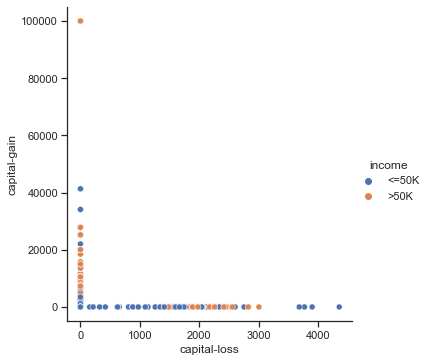

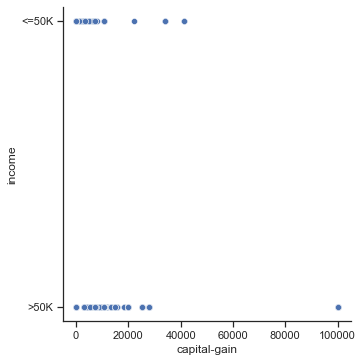

In [136]:
sns.relplot(x="capital-loss", y="capital-gain", data=df, hue="income")
plt.show()
sns.relplot(x="capital-gain", y="income", data=df)
plt.show()

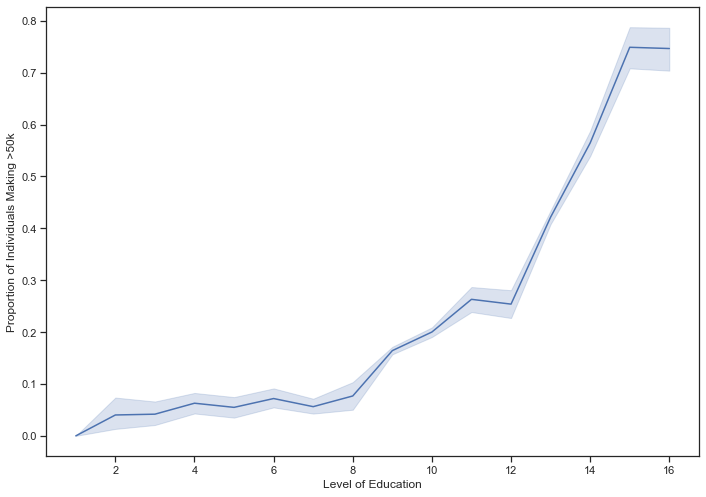

In [142]:
ax = sns.lineplot(data=df, x="education-num", y="income")
plt.xlabel("Level of Education")
plt.ylabel("Proportion of Individuals Making >50k")
plt.show()

In [137]:
n_gains = df_less[df_less['capital-loss'] > 0].shape[0]
print("Total number of records with some capital loss (<=50k): {}".format(n_gains))

n_gains = df_more[df_more['capital-loss'] > 0].shape[0]
print("Total number of records with some capital loss (>50k): {}".format(n_gains))

Total number of records with some capital loss (<=50k): 690
Total number of records with some capital loss (>50k): 737


In [138]:
#convert categorical data into numerical values
for col_name in df.columns:
    if (df[col_name].dtype == 'object'):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

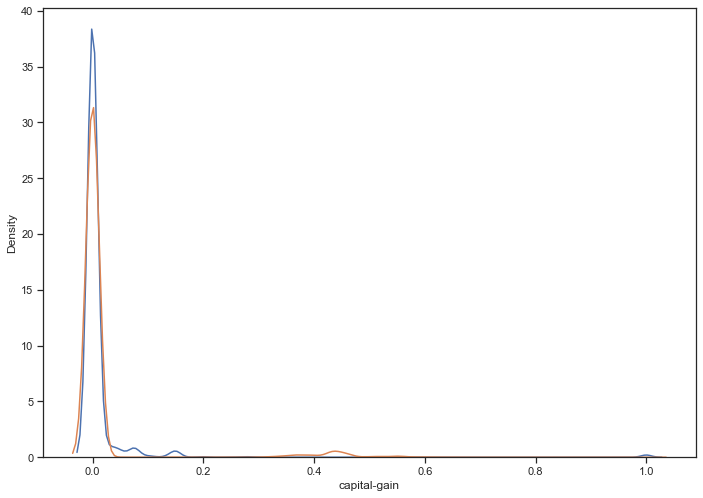

In [139]:
#Scale data for capital gain, capital loss
df1 = df[['capital-gain','capital-loss']]
scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(df1))
df[['capital-gain']] = scaled_df[0]
df[['capital-loss']] = scaled_df[1]
sns.kdeplot(df['capital-gain'])
sns.kdeplot(df['capital-loss'])

In [140]:
print("Kendall Correlation: ")
print(df.corr(method='kendall'))

print("Pearson Correlation: ")
print(df.corr(method='pearson'))

Kendall Correlation: 
                     age  workclass  education  education-num  marital-status  \
age             1.000000   0.052242  -0.011002       0.055452       -0.293802   
workclass       0.052242   1.000000   0.005607       0.005271       -0.034638   
education      -0.011002   0.005607   1.000000       0.190389       -0.015975   
education-num   0.055452   0.005271   0.190389       1.000000       -0.048786   
marital-status -0.293802  -0.034638  -0.015975      -0.048786        1.000000   
occupation     -0.003995   0.008866  -0.032830       0.066805        0.017789   
relationship   -0.230579  -0.080749   0.010342      -0.076055        0.268245   
race            0.018704   0.060470   0.006191       0.039758       -0.079151   
sex             0.075605   0.091013  -0.029705       0.000427       -0.134974   
capital-gain   -0.005008   0.001791  -0.008383      -0.003196        0.003212   
capital-loss   -0.005937  -0.001402  -0.005369      -0.003364        0.011475   
hours-

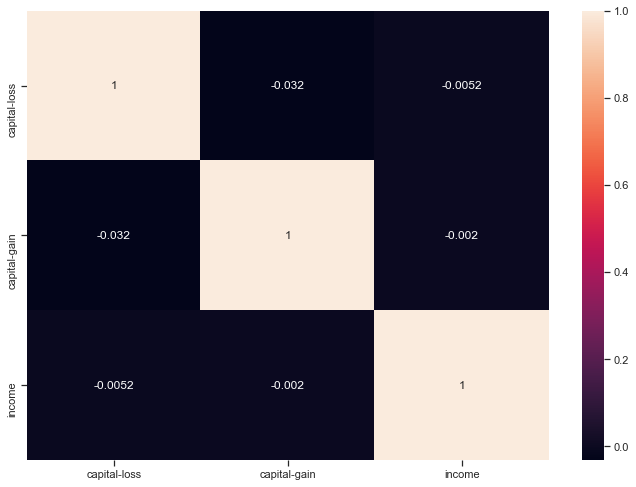

In [141]:
df2 = pd.DataFrame(df,columns=['capital-loss','capital-gain','income'])
sns.heatmap(df2.corr('pearson'),annot=True)
plt.show()